**Importar librerias**

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Contenido de la base de datos**  
- **age**: edad del beneficiario principal
- **sex**: contratista de seguros género, femenino, masculino
- **bmi**: Índice de masa corporal, que proporciona una comprensión del cuerpo, pesos que son relativamente altos o bajos en relación con la altura
- **children**: Número de niños cubiertos por el seguro de salud / Número de dependientes
- **smoker**: Si el individuo fuma o no
- **region**: el área residencial del beneficiario en los EE. UU., noreste, sureste, suroeste, noroeste.
- **charges**: costos médicos individuales facturados por el seguro de salud

In [3]:
df = pd.read_csv("insurance.csv")
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


## Analisís exploratorio de datos
A continuación, se realizaran algunos gráficos con el objetivo de conocer la base de datos y su comportamiento para las diferentes variables.

El siguiente grafico de barras nos permite separar a las personas por genero y ver la cantidad de fumadores para cada uno, podemos ver que los hombres tienen mayor proporcion de fumadores.

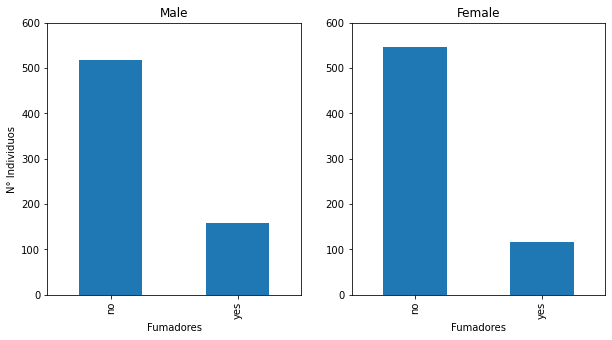

In [34]:
df_male = df[df["sex"]=="male"]
df_female = df[df["sex"]=="female"]
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
df_male['smoker'].value_counts().plot(kind='bar',ax=axes[0],xlabel="Fumadores",ylabel="N° Individuos",ylim=(0,600),title="Male")
df_female['smoker'].value_counts().plot(kind='bar',ax=axes[1],xlabel="Fumadores",ylim=(0,600),title="Female")
plt.show()

A continuación, podemos la proporcion del número de niños cubiertos por el seguro de salud.

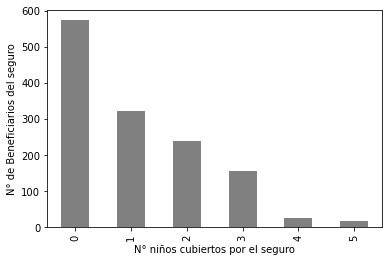

In [105]:
df['children'].value_counts().plot(kind='bar',color='grey')
plt.xlabel("N° niños cubiertos por el seguro")
plt.ylabel("N° de Beneficiarios del seguro")
plt.show()

En el siguiente grafico, la base de datos la separamos por genero masculino, y ademas la clasificamos por personas fumadoras y no fumadoras, y graficamos un histograma de costos médicos individuales facturados por el seguro de salud.   
  
Es posible apreciar que los hombres que si fuman presentan costos medicos facturados más altos que la gente no fumadora.

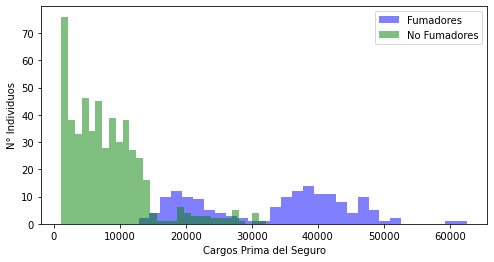

In [55]:
df_male_yes_smoke=df_male[df_male["smoker"]=="yes"]
df_male_no_smoke=df_male[df_male["smoker"]=="no"]

fig,ax = plt.subplots(figsize=(8,4))
ax.hist(df_male_yes_smoke["charges"],label="Fumadores",alpha=.5,bins=30,color='blue')
ax.hist(df_male_no_smoke["charges"],label="No Fumadores",alpha=.5,bins=30,color='green')
ax.set_xlabel("Cargos Prima del Seguro")
ax.set_ylabel("N° Individuos")
plt.legend(loc='upper right')
plt.show()

Situación similar pasa para las mujeres, analizando el mismo concepto.

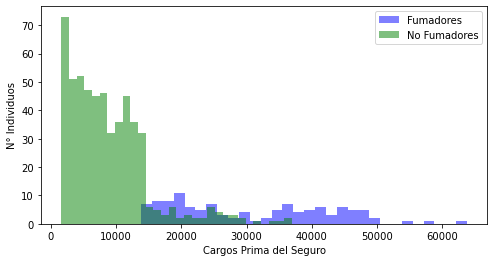

In [56]:
df_female_yes_smoke=df_female[df_female["smoker"]=="yes"]
df_female_no_smoke=df_female[df_female["smoker"]=="no"]

fig,ax = plt.subplots(figsize=(8,4))
ax.hist(df_female_yes_smoke["charges"],label="Fumadores",alpha=.5,bins=30,color='blue')
ax.hist(df_female_no_smoke["charges"],label="No Fumadores",alpha=.5,bins=30,color='green')
ax.set_xlabel("Cargos Prima del Seguro")
ax.set_ylabel("N° Individuos")
plt.legend(loc='upper right')
plt.show()

El el siguiente gráfico de dispersión podemos ver la variable "edad" vs "Costos médicos individuales", se aprecia que existe correlación entre estas variables, por lo tanto, estas seran nuestras 2 variables a analizar y realizar una regresión linea, con el objetivo de tener un modelo predictivo.

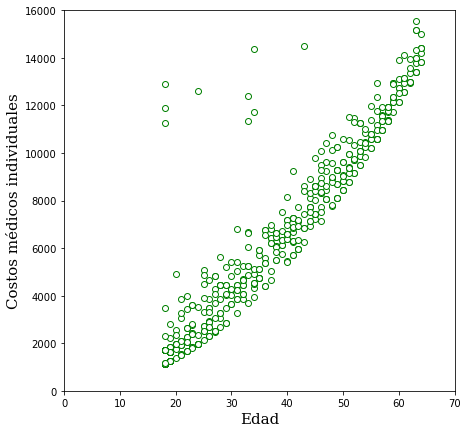

In [141]:
fig,ax = plt.subplots(figsize=(7,7))
plt.scatter(df_male_no_smoke["age"],df_male_no_smoke["charges"],marker='o',color='green',facecolor='w')
plt.xlabel("Edad",fontsize=15,family='serif')
plt.ylim(0,16000)
plt.xlim(0,70)
plt.ylabel("Costos médicos individuales",fontsize=15,family='serif')
plt.show()

**Generar Regresión Lineal**

In [130]:
reg = np.polyfit(df_male_no_smoke["age"],df_male_no_smoke["charges"],deg=1)
print("Pendiente:",reg[0])
print("Intersección en Y:",reg[1])

Pendiente: 264.9317027297567
Intersección en Y: -2261.5297689698946


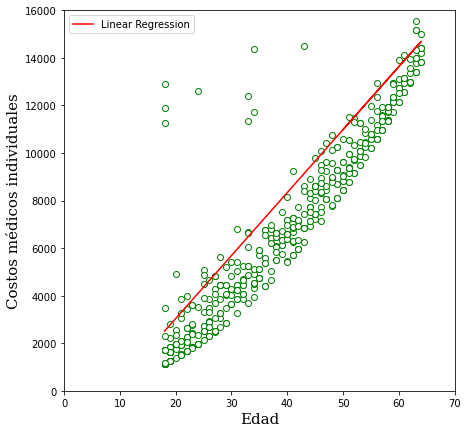

In [140]:
trend = np.polyval(reg,df_male_no_smoke["age"])
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(df_male_no_smoke["age"],df_male_no_smoke["charges"],marker='o',color='green',facecolor='w')
ax.plot(df_male_no_smoke["age"],trend,'r',label="Linear Regression")
ax.set_ylim(0,16000)
ax.set_xlim(0,70)


plt.xlabel("Edad",fontsize=15,family='serif')
plt.ylabel("Costos médicos individuales",fontsize=15,family='serif')
plt.legend()
plt.show()

* La variable dependiente son los "Costos médicos individuales", podemos ver que estos dependen de la edad del individuo.
* La pendiente que se tiene es bastante alta, pero se debe a la unidad de medida en que estan estas variables, esto refleja que a medida de que la persona tiene mayor edad los costos aumentan significativamente.